In [ ]:
# Apply Decision Tree, Random Forest models to analyze the flu data.

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
import random
import pandas as pd

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [104]:
from sklearn.model_selection import train_test_split

In [114]:
#separate data into two data frames: features and target. take out the respondent ids from both
df_flu_train_features_DT = pd.read_csv('./df_flu_train_clean_noNaNs_featuresonly.csv')
df_flu_train_target_DT = pd.read_csv('./df_flu_target_clean_noNaNs_seasonal.csv')

In [115]:
df_flu_train_features_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   h1n1_concern                 19642 non-null  int64 
 1   h1n1_knowledge               19642 non-null  int64 
 2   behavioral_antiviral_meds    19642 non-null  int64 
 3   behavioral_avoidance         19642 non-null  int64 
 4   behavioral_face_mask         19642 non-null  int64 
 5   behavioral_wash_hands        19642 non-null  int64 
 6   behavioral_large_gatherings  19642 non-null  int64 
 7   behavioral_outside_home      19642 non-null  int64 
 8   behavioral_touch_face        19642 non-null  int64 
 9   doctor_recc_h1n1             19642 non-null  int64 
 10  doctor_recc_seasonal         19642 non-null  int64 
 11  chronic_med_condition        19642 non-null  int64 
 12  child_under_6_months         19642 non-null  int64 
 13  health_worker                19

In [116]:
df_flu_train_target_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   seasonal_vaccine  19642 non-null  int64
dtypes: int64(1)
memory usage: 153.6 KB


In [117]:
df_flu_train_features_DT.head(10)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1,0,0,0,0,0,0,1,1,0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0
1,3,2,0,1,0,1,0,1,1,0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0
2,1,1,0,1,0,1,1,0,0,0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0
3,2,1,0,1,0,1,1,0,1,0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0
4,3,1,0,1,0,1,0,0,1,0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2,3
5,0,0,0,0,0,0,0,0,0,0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0,0
6,1,0,0,1,0,1,0,0,1,1,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2,0
7,0,2,0,1,0,1,1,1,1,0,...,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1,0
8,2,1,0,1,0,0,1,0,1,0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0,0
9,2,1,0,1,0,1,1,0,0,0,...,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2,0


In [118]:
df_flu_train_target_DT.head()

,seasonal_vaccine
0,0
1,1
2,1
3,0
4,0


In [39]:
df_flu_train_DT['age_group'].value_counts()
##I'm not going to re-do all the value counts for the features

65+ Years        4491
55 - 64 Years    4234
45 - 54 Years    4038
18 - 34 Years    3925
35 - 44 Years    2954
Name: age_group, dtype: int64

In [40]:
df_flu_train_DT['education'].value_counts()

College Graduate    8165
Some College        5570
12 Years            4287
< 12 Years          1620
Name: education, dtype: int64

In [41]:
df_flu_train_DT['race'].value_counts()
#race is really unbalanced

White                15745
Black                 1474
Hispanic              1295
Other or Multiple     1128
Name: race, dtype: int64

In [42]:
df_flu_train_DT['sex'].value_counts()

Female    11638
Male       8004
Name: sex, dtype: int64

In [43]:
df_flu_train_DT['income_poverty'].value_counts()

<= $75,000, Above Poverty    11185
> $75,000                     6159
Below Poverty                 2298
Name: income_poverty, dtype: int64

In [44]:
df_flu_train_DT['marital_status'].value_counts()

Married        10768
Not Married     8874
Name: marital_status, dtype: int64

In [45]:
df_flu_train_DT['rent_or_own'].value_counts()

Own     14980
Rent     4662
Name: rent_or_own, dtype: int64

In [46]:
df_flu_train_DT['employment_status'].value_counts()

Employed              11093
Not in Labor Force     7417
Unemployed             1132
Name: employment_status, dtype: int64

In [47]:
df_flu_train_DT['hhs_geo_region'].value_counts()

lzgpxyit    3098
fpwskwrf    2328
qufhixun    2309
oxchjgsf    2171
bhuqouqj    2138
kbazzjca    2062
mlyzmhmf    1658
lrircsnp    1541
atmpeygn    1521
dqpwygqj     816
Name: hhs_geo_region, dtype: int64

In [48]:
df_flu_train_DT['census_msa'].value_counts()

MSA, Not Principle  City    8571
MSA, Principle City         5717
Non-MSA                     5354
Name: census_msa, dtype: int64

In [113]:
df_flu_train_target_DT['seasonal_vaccine'].value_counts()

0    10254
1     9388
Name: seasonal_vaccine, dtype: int64

In [119]:
#get dummy variables for the categorical features. First make a copy of the data frame
df_flu_train_features_DT_1=df_flu_train_features_DT.copy()
pd.get_dummies(df_flu_train_features_DT_1)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,3,2,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,2,1,0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,3,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19637,3,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
19638,2,2,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
19639,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
19640,1,2,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter
from sklearn.tree import DecisionTreeClassifier


# make prettier plots
%config InlineBackend.figure_format = 'svg' 

In [129]:
#ok so because the features df now only has features, and the target df only has the target,
#I can avoid doing that ugly slicing thing. Also I'm not going to stratify because they categories are fairly balanced
# don't need stratify=pd.get_dummies(df_flu_train_DT_1).iloc[:, 62:63]
X_train, X_val, y_train, y_val = train_test_split(pd.get_dummies(df_flu_train_features_DT_1), df_flu_train_target_DT, 
                                                    test_size = 0.2, random_state=42)

In [130]:
#Run the decision tree  model for a range of max depths
#decisiontree = DecisionTreeClassifier(max_depth=4)
#decisiontree.fit(X_train, y_train)
score1=0
max_depth_list=[]
score1_list=[]
for d in range(2,40):
    decisiontree = DecisionTreeClassifier(max_depth=d)
    decisiontree.fit(X_train, y_train)
    score1=decisiontree.score(X_val, y_val)
    max_depth_list.append(d)
    score1_list.append(score1)
    print("the decision tree score for max depth ", d, "is ", score1 )
print(max_depth_list)
print(score1_list)

the decision tree score for max depth  2 is  0.7139221175871723
the decision tree score for max depth  3 is  0.7406464749300077
the decision tree score for max depth  4 is  0.7498091117332655
the decision tree score for max depth  5 is  0.7579536777806057
the decision tree score for max depth  6 is  0.7612624077373378
the decision tree score for max depth  7 is  0.7569356070246882
the decision tree score for max depth  8 is  0.7505726648002036
the decision tree score for max depth  9 is  0.7520997709340799
the decision tree score for max depth  10 is  0.7518452532451005
the decision tree score for max depth  11 is  0.7411555103079664
the decision tree score for max depth  12 is  0.7332654619496055
the decision tree score for max depth  13 is  0.7266480020361415
the decision tree score for max depth  14 is  0.7131585645202342
the decision tree score for max depth  15 is  0.7103588699414609
the decision tree score for max depth  16 is  0.7108679053194197
the decision tree score for max d

In [131]:
##For decision tree, it looks like the best score is at max depth 6.

In [132]:
import seaborn as sns

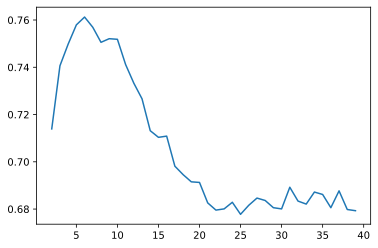

In [133]:
data_tuples = list(zip(max_depth_list,score1_list))
DT_score_df=pd.DataFrame(data=data_tuples, columns=['max_depth1', 'score1'])

plt.plot(DT_score_df.max_depth1, DT_score_df.score1)

In [134]:
#need metrics for decision tree. Use max_depth=4
# precision_score, recall_score, accuracy_score, roc_auc_score
# accuracy_score, confusion_matrix
# what about feature_importances_?
decisiontree = DecisionTreeClassifier(max_depth=6)
decisiontree.fit(X_train, y_train)
decisiontree.score(X_val, y_val)

0.7612624077373378

In [135]:
decisiontree.feature_importances_

array([0.0008865 , 0.00122091, 0.        , 0.        , 0.00096434,
       0.        , 0.        , 0.        , 0.        , 0.00362238,
       0.2185687 , 0.        , 0.        , 0.01643055, 0.00221903,
       0.0019563 , 0.00495282, 0.1600758 , 0.43603803, 0.01364371,
       0.        , 0.00199311, 0.02658391, 0.        , 0.00322   ,
       0.00396363, 0.05185724, 0.        , 0.00062343, 0.        ,
       0.        , 0.00131365, 0.00917836, 0.        , 0.        ,
       0.00093013, 0.        , 0.        , 0.0043273 , 0.0175469 ,
       0.        , 0.        , 0.01788326, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [136]:
pd.get_dummies(df_flu_train_features_DT_1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 60 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   h1n1_concern                              19642 non-null  int64
 1   h1n1_knowledge                            19642 non-null  int64
 2   behavioral_antiviral_meds                 19642 non-null  int64
 3   behavioral_avoidance                      19642 non-null  int64
 4   behavioral_face_mask                      19642 non-null  int64
 5   behavioral_wash_hands                     19642 non-null  int64
 6   behavioral_large_gatherings               19642 non-null  int64
 7   behavioral_outside_home                   19642 non-null  int64
 8   behavioral_touch_face                     19642 non-null  int64
 9   doctor_recc_h1n1                          19642 non-null  int64
 10  doctor_recc_seasonal                      19642 non-null  

In [143]:
decisiontree.decision_path(X_val)

<3929x125 sparse matrix of type '<class 'numpy.int64'>'
	with 27501 stored elements in Compressed Sparse Row format>

In [144]:
decisiontree.predict_log_proba(X_val)

/Users/amysillman/.conda/envs/metis/lib/python3.8/site-packages/sklearn/tree/_classes.py:973: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


array([[-0.16183175, -1.90102297],
       [-0.06836096, -2.71693915],
       [-0.74086995, -0.64759851],
       ...,
       [-0.16183175, -1.90102297],
       [-2.54808555, -0.08146095],
       [-0.20441251, -1.68808104]])

In [145]:
decisiontree.predict_proba(X_val)

array([[0.85058431, 0.14941569],
       [0.9339233 , 0.0660767 ],
       [0.47669903, 0.52330097],
       ...,
       [0.85058431, 0.14941569],
       [0.07823129, 0.92176871],
       [0.81512605, 0.18487395]])

In [146]:
decisiontree.get_n_leaves()

63

In [147]:
decisiontree.get_depth()

6

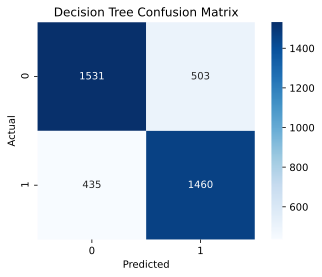

In [181]:
decisiontree_confusion = confusion_matrix(y_true=y_val, y_pred=decisiontree.predict(X_val))
plt.figure(dpi=150)
sns.heatmap(decisiontree_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt="d"
           )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix');

In [184]:
y_predict = (decisiontree.predict_proba(X_val))
print("max_depth of 6:")
#print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
    #                                                 recall_score(y_val, y_predict)))
print('Precision: ', precision_score(y_val, y_predict) )
print('Recall: ', recall_score(y_val, y_predict))

max_depth of 6:


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [160]:
#now try Random Forest. need to use np.ravel(y_train) to pass an array instead of a column vector
est_list=[]
score_list=[]
for num in range(150,525,25):
    randomforest = RandomForestClassifier(n_estimators=num)
    randomforest.fit(X_train, np.ravel(y_train))
    est_list.append(num)
    score2=randomforest.score(X_val, y_val)
    score_list.append(score2)
    print(num,' classifiers', 'score ', score2)

150  classifiers score  0.7841689997454823
175  classifiers score  0.7800967167218121
200  classifiers score  0.7856961058793586
225  classifiers score  0.7834054466785442
250  classifiers score  0.7841689997454823
275  classifiers score  0.7823873759226266
300  classifiers score  0.7831509289895647
325  classifiers score  0.7836599643675235
350  classifiers score  0.7813693051667091
375  classifiers score  0.7813693051667091
400  classifiers score  0.7844235174344617
425  classifiers score  0.7821328582336472
450  classifiers score  0.7839144820565029
475  classifiers score  0.7839144820565029
500  classifiers score  0.784678035123441


In [175]:
#200 estimators seems to perform the best of the numbers tested
#test on val data to see if score is better or worse than on training data (overfit?)
randomforest = RandomForestClassifier(n_estimators=300)
randomforest.fit(X_train, np.ravel(y_train))
randomforest.score(X_val, np.ravel(y_val))
#300 estimators gives a better score on the validation data than the training data
#Also note that this score is higher than the decision tree model above with max_depth=6

0.7856961058793586

In [176]:
randomforest.feature_importances_
#feature indexes 10, 17, 18 important just as they were in the decision tree model

array([0.02969159, 0.02118456, 0.00517589, 0.01231734, 0.00560952,
       0.00947037, 0.01310863, 0.01341236, 0.0138603 , 0.01647005,
       0.06872097, 0.01608298, 0.00698394, 0.01553315, 0.03388034,
       0.0378994 , 0.02755906, 0.08564149, 0.10375613, 0.03105846,
       0.02283106, 0.02244623, 0.01734569, 0.00873895, 0.00978111,
       0.01055228, 0.0259749 , 0.01039874, 0.00675367, 0.01300157,
       0.01201262, 0.00611116, 0.00585749, 0.00482575, 0.01059829,
       0.01211581, 0.01202814, 0.01171848, 0.01099409, 0.00782457,
       0.01065166, 0.01069051, 0.00922652, 0.00898143, 0.01036862,
       0.01155937, 0.00502875, 0.00789094, 0.00970662, 0.00451279,
       0.00971662, 0.00882781, 0.00785654, 0.01053537, 0.00753627,
       0.00926882, 0.00964799, 0.01395576, 0.01257527, 0.01213519])

In [177]:
randomforest.predict_proba(X_val)

array([[0.9       , 0.1       ],
       [0.81666667, 0.18333333],
       [0.37333333, 0.62666667],
       ...,
       [0.73      , 0.27      ],
       [0.27666667, 0.72333333],
       [0.58333333, 0.41666667]])

In [178]:
randomforest.predict_log_proba(X_val)

array([[-0.10536052, -2.30258509],
       [-0.20252426, -1.69644929],
       [-0.9852836 , -0.46734051],
       ...,
       [-0.31471074, -1.30933332],
       [-1.28494187, -0.32388512],
       [-0.5389965 , -0.87546874]])

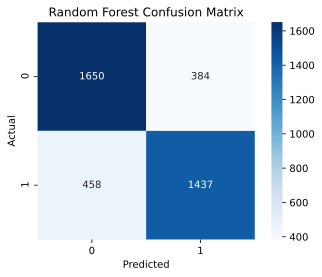

In [182]:
randomforest_confusion = confusion_matrix(y_true=y_val, y_pred=randomforest.predict(X_val))
plt.figure(dpi=150)
sns.heatmap(randomforest_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt="d"
           )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix');